In [16]:
#HOUSE PRICE PREDICTION DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=pd.read_csv(r"C:\Users\BHUMIKA RAVI\Downloads\House Price Prediction Dataset.csv")
print(df)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

In [17]:
#using df operations 
#shows first five elements
df.head()  

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [18]:
df.tail()  #shows last 5 elements in the dataframe

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [19]:
df["Area"] = pd.to_datetime(df["Area"])

In [20]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1970-01-01 00:00:00.000001360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,1970-01-01 00:00:00.000004272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,1970-01-01 00:00:00.000003592,2,2,3,1938,Downtown,Good,No,266746
3,4,1970-01-01 00:00:00.000000966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,1970-01-01 00:00:00.000004926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1970-01-01 00:00:00.000004994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,1970-01-01 00:00:00.000003046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1970-01-01 00:00:00.000001062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,1970-01-01 00:00:00.000004062,3,1,2,1936,Urban,Excellent,Yes,161119


In [21]:
#shows the stastical configration of the dataframe
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,1970-01-01 00:00:00.000002786,3.003500,2.55250,1.993500,1961.446000,537676.855000
min,1.000000,1970-01-01 00:00:00.000000501,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1970-01-01 00:00:00.000001653,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,1970-01-01 00:00:00.000002833,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,1970-01-01 00:00:00.000003887,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,1970-01-01 00:00:00.000004999,5.000000,4.00000,3.000000,2023.000000,999656.000000
std,577.494589,NaN,1.424606,1.10899,0.809188,35.926695,276428.845719


In [22]:
#used to describe the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         2000 non-null   int64         
 1   Area       2000 non-null   datetime64[ns]
 2   Bedrooms   2000 non-null   int64         
 3   Bathrooms  2000 non-null   int64         
 4   Floors     2000 non-null   int64         
 5   YearBuilt  2000 non-null   int64         
 6   Location   2000 non-null   object        
 7   Condition  2000 non-null   object        
 8   Garage     2000 non-null   object        
 9   Price      2000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 156.4+ KB


In [23]:
#checking for the misssing values
print(df.isnull().sum())  

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [24]:
#checcking for the duplicate values 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [25]:
#removing the duplicate value in the data frame
print(df.duplicated().sum())  # Count duplicates
df.drop_duplicates(inplace=True)  # Remove duplicates

0


In [26]:
# Strip spaces and remove any unwanted characters
df.columns = df.columns.str.strip()
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1970-01-01 00:00:00.000001360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,1970-01-01 00:00:00.000004272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,1970-01-01 00:00:00.000003592,2,2,3,1938,Downtown,Good,No,266746
3,4,1970-01-01 00:00:00.000000966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,1970-01-01 00:00:00.000004926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1970-01-01 00:00:00.000004994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,1970-01-01 00:00:00.000003046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1970-01-01 00:00:00.000001062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,1970-01-01 00:00:00.000004062,3,1,2,1936,Urban,Excellent,Yes,161119


In [27]:
# Check column data types
print(df.dtypes) 

Id                    int64
Area         datetime64[ns]
Bedrooms              int64
Bathrooms             int64
Floors                int64
YearBuilt             int64
Location             object
Condition            object
Garage               object
Price                 int64
dtype: object


In [28]:
data=pd.read_csv(r"C:\Users\BHUMIKA RAVI\Downloads\House Price Prediction Dataset.csv")

# Strip spaces and remove any unwanted characters
data.columns = data.columns.str.strip()

print(data.columns)

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [29]:
df.columns = df.columns.str.strip()
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1970-01-01 00:00:00.000001360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,1970-01-01 00:00:00.000004272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,1970-01-01 00:00:00.000003592,2,2,3,1938,Downtown,Good,No,266746
3,4,1970-01-01 00:00:00.000000966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,1970-01-01 00:00:00.000004926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1970-01-01 00:00:00.000004994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,1970-01-01 00:00:00.000003046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1970-01-01 00:00:00.000001062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,1970-01-01 00:00:00.000004062,3,1,2,1936,Urban,Excellent,Yes,161119


In [30]:
df["Price"] = df["Price"].astype(int)
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1970-01-01 00:00:00.000001360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,1970-01-01 00:00:00.000004272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,1970-01-01 00:00:00.000003592,2,2,3,1938,Downtown,Good,No,266746
3,4,1970-01-01 00:00:00.000000966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,1970-01-01 00:00:00.000004926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1970-01-01 00:00:00.000004994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,1970-01-01 00:00:00.000003046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1970-01-01 00:00:00.000001062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,1970-01-01 00:00:00.000004062,3,1,2,1936,Urban,Excellent,Yes,161119


In [31]:
df.columns = df.columns.str.strip()
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1970-01-01 00:00:00.000001360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,1970-01-01 00:00:00.000004272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,1970-01-01 00:00:00.000003592,2,2,3,1938,Downtown,Good,No,266746
3,4,1970-01-01 00:00:00.000000966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,1970-01-01 00:00:00.000004926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1970-01-01 00:00:00.000004994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,1970-01-01 00:00:00.000003046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1970-01-01 00:00:00.000001062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,1970-01-01 00:00:00.000004062,3,1,2,1936,Urban,Excellent,Yes,161119


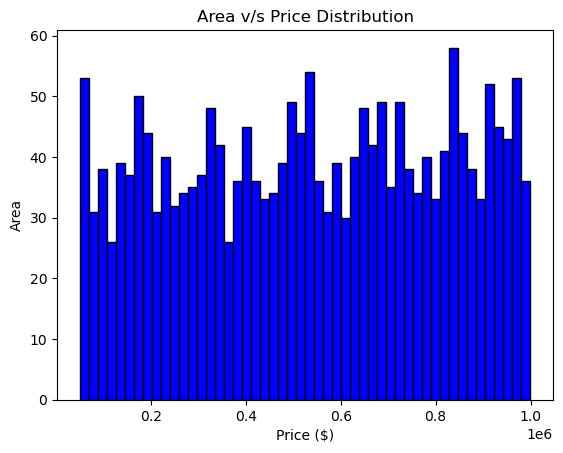

In [32]:
#plots!!
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\BHUMIKA RAVI\Downloads\House Price Prediction Dataset.csv")


plt.hist(df['Price'], bins=50, color='blue', edgecolor='black')
plt.xlabel("Price ($)")
plt.ylabel("Area")
plt.title("Area v/s Price Distribution")
plt.show()


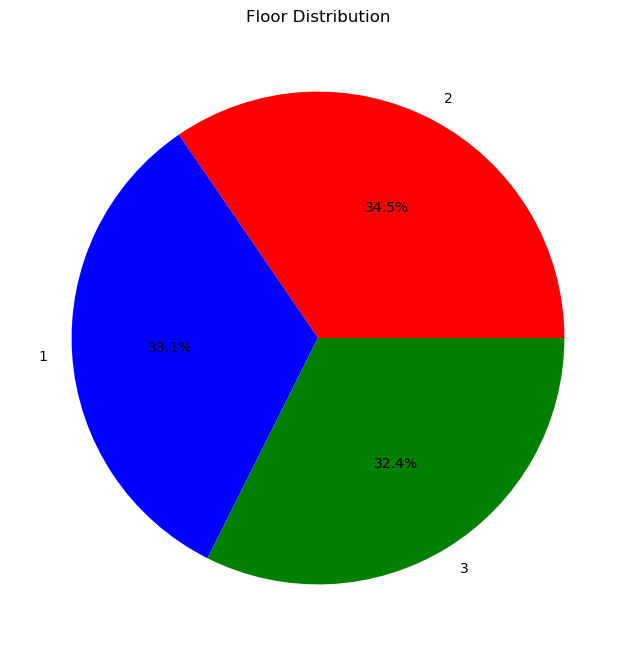

In [33]:
#pie chart
area_counting = df['Floors'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(area_counting, labels=area_counting.index, autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title("Floor Distribution")
plt.show()

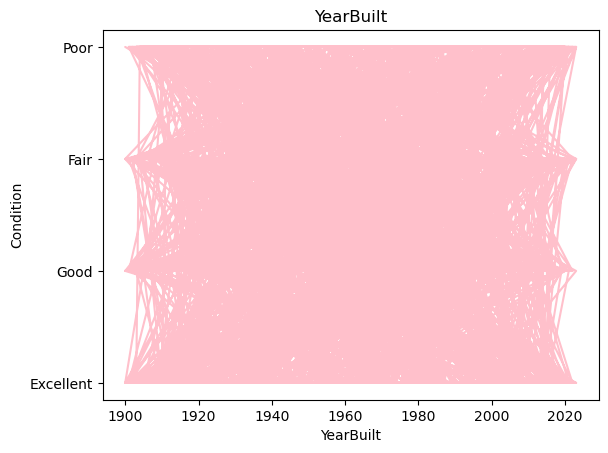

In [34]:
plt.plot(df["YearBuilt"], df["Condition"], color="pink")

plt.xlabel("YearBuilt")
plt.ylabel("Condition")
plt.title("YearBuilt")
plt.show()


# Add grid line

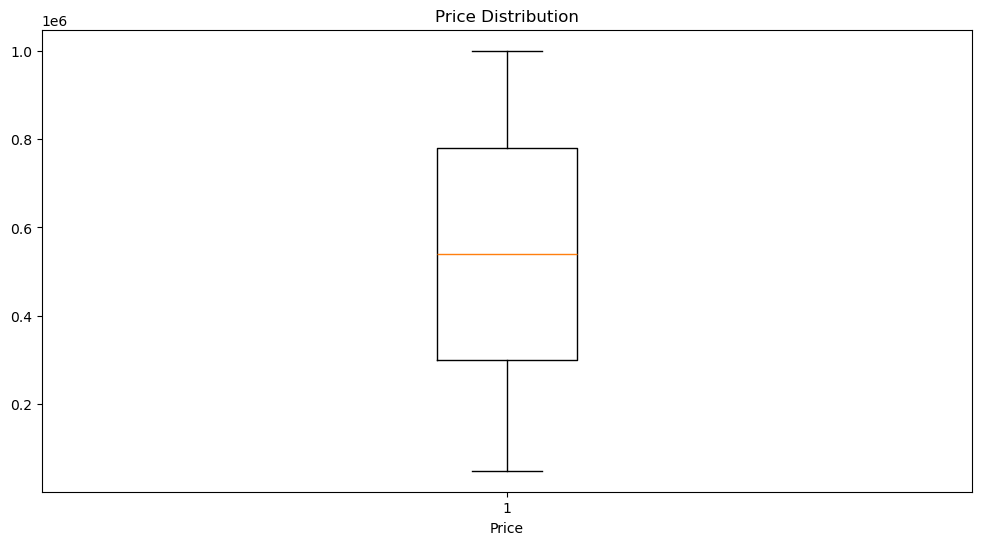

In [35]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['Price'])
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()


In [36]:
print(df.shape)

(2000, 10)


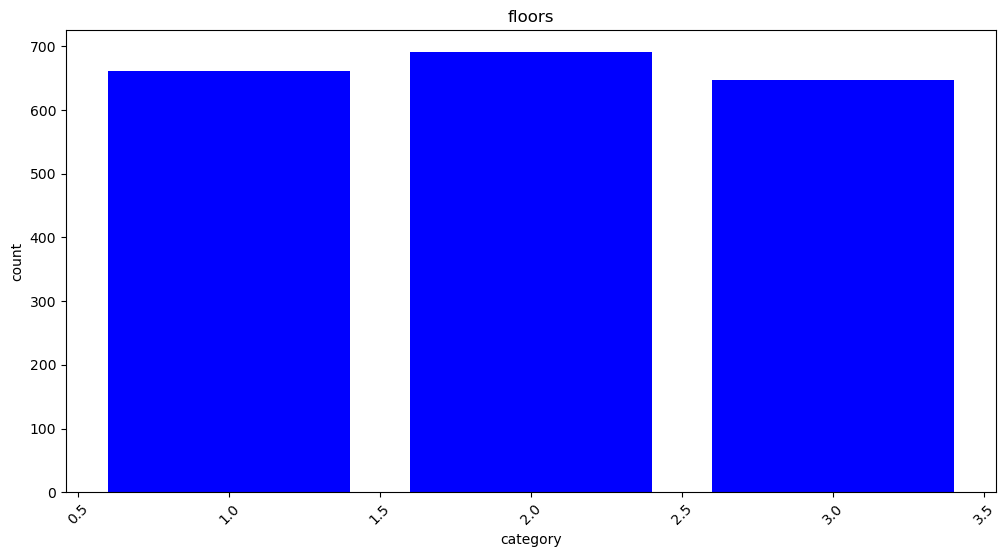

In [37]:
import matplotlib.pyplot as plt

top_categories = df["Floors"].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(top_categories.index, top_categories.values, color='blue')
plt.xticks(rotation=45)
plt.xlabel("category")
plt.ylabel("count")
plt.title("floors")
plt.show()


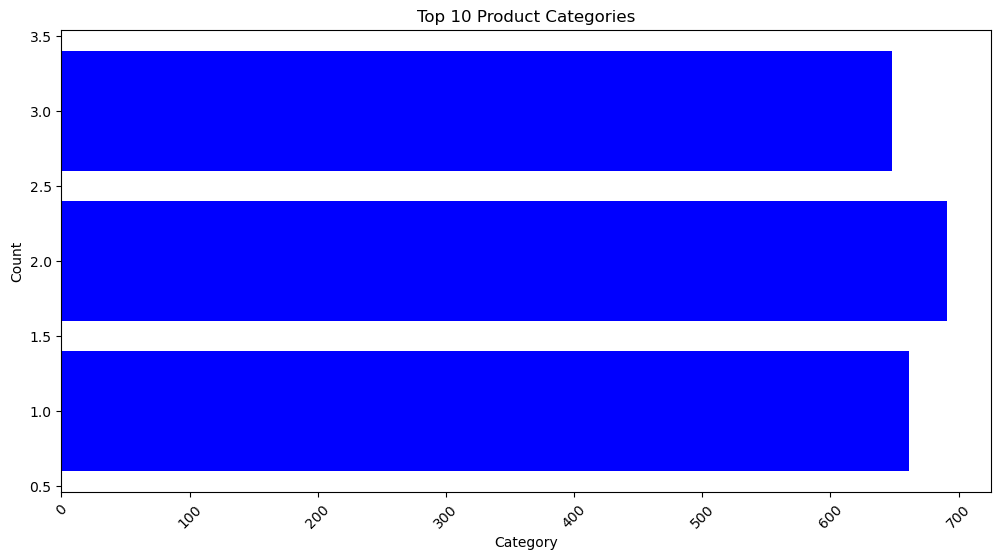

In [38]:
import matplotlib.pyplot as plt

#this Count the number of products in each category and select the top 10
floors_count = df['Floors'].value_counts().nlargest(10)



plt.figure(figsize=(12, 6))
plt.barh(floors_count.index, floors_count.values, color='blue')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Top 10 Product Categories")
plt.show()


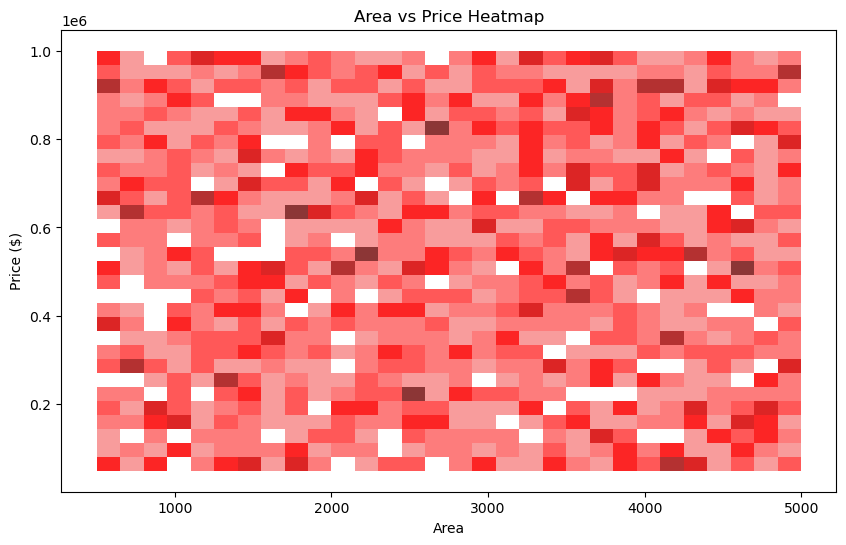

In [39]:
#Areq vs Price Heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Area", y="Price", bins=30,color ="red" )
plt.title("Area vs Price Heatmap")
plt.xlabel("Area")
plt.ylabel("Price ($)")
plt.show()


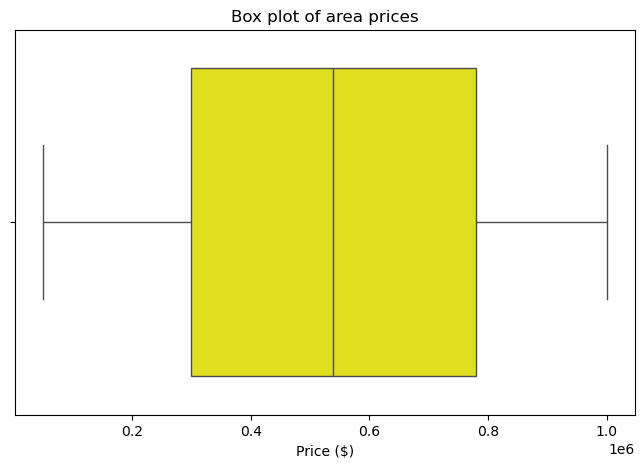

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Price"], color="yellow")
plt.title("Box plot of area prices")
plt.xlabel("Price ($)")
plt.show()


In [41]:
Q1 = df["Price"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df["Price"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                      # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
print("Outliers in Price Column:\n", outliers)


Outliers in Price Column:
 Empty DataFrame
Columns: [Id, Area, Bedrooms, Bathrooms, Floors, YearBuilt, Location, Condition, Garage, Price]
Index: []


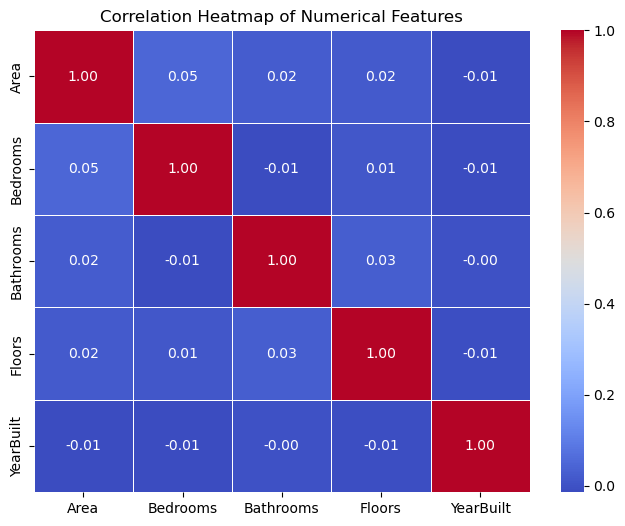

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df[["Area","Bedrooms","Bathrooms","Floors","YearBuilt"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


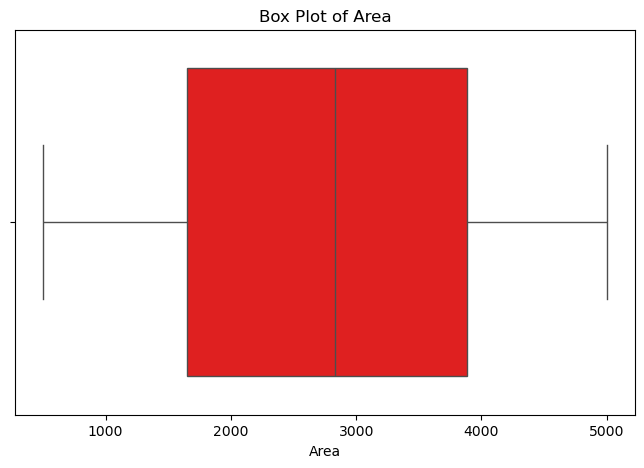

In [43]:
#box plot with area
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Area"], color="red")
plt.title("Box Plot of Area")
plt.xlabel("Area")
plt.show()

In [44]:
df.describe().T   #transpose function is used to make rows to colums and columns to rows

,count,mean,std,min,25%,50%,75%,max
Id,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Area,2000.0,2786.2095,1295.146799,501.0,1653.00,2833.0,3887.50,4999.0
Bedrooms,2000.0,3.0035,1.424606,1.0,2.00,3.0,4.00,5.0
Bathrooms,2000.0,2.5525,1.108990,1.0,2.00,3.0,4.00,4.0
Floors,2000.0,1.9935,0.809188,1.0,1.00,2.0,3.00,3.0
YearBuilt,2000.0,1961.4460,35.926695,1900.0,1930.00,1961.0,1993.00,2023.0
Price,2000.0,537676.8550,276428.845719,50005.0,300098.00,539254.0,780086.00,999656.0


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score

#Load your dataset

df=pd.read_csv(r"C:\Users\BHUMIKA RAVI\Downloads\House Price Prediction Dataset.csv")
df["Area"] = pd.to_datetime(df["Area"])
df["YearBuilt"]=(pd.Timestamp.now()-df["Area"]).dt.days
x=df[['Bedrooms','Bathrooms','Floors','YearBuilt']]
y=df['Area']

In [46]:
x

,Bedrooms,Bathrooms,Floors,YearBuilt
0,5,4,3,20197
1,5,4,3,20197
2,2,2,3,20197
3,4,2,2,20197
4,1,4,2,20197
...,...,...,...,...
1995,5,4,3,20197
1996,5,2,1,20197
1997,5,1,2,20197
1998,3,1,2,20197


In [47]:
y

0      1970-01-01 00:00:00.000001360
1      1970-01-01 00:00:00.000004272
2      1970-01-01 00:00:00.000003592
3      1970-01-01 00:00:00.000000966
4      1970-01-01 00:00:00.000004926
                    ...             
1995   1970-01-01 00:00:00.000004994
1996   1970-01-01 00:00:00.000003046
1997   1970-01-01 00:00:00.000001062
1998   1970-01-01 00:00:00.000004062
1999   1970-01-01 00:00:00.000002989
Name: Area, Length: 2000, dtype: datetime64[ns]

In [48]:
#spilt the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
#train the model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred=model.predict(x_test)

In [51]:
y_pred

array([2733.23707412, 2662.28759564, 2662.28759564, 2804.21888142,
       2733.23707412, 2697.9288606 , 2733.53779675, 2768.30922264,
       2803.93432319, 2733.25323853, 2768.86217468, 2839.55942375,
       2769.1467329 , 2946.13400279, 2839.54325934, 2732.98484471,
       2732.98484471, 2910.50890223, 2768.57761646, 2733.52163235,
       2732.70028649, 2768.86217468, 2804.21888142, 2732.96868031,
       2697.9288606 , 2768.86217468, 2804.21888142, 2839.29102993,
       2697.35974416, 2875.45291812, 2768.86217468, 2662.28759564,
       2874.89996608, 2839.54325934, 2875.1683599 , 2768.32538704,
       2733.52163235, 2768.32538704, 2768.60994527, 2840.11237579,
       2768.89450349, 2875.1683599 , 2803.66592938, 2697.64430238,
       2769.1467329 , 2803.93432319, 2910.52506664, 2732.98484471,
       2839.27486553, 2910.79346046, 2662.01920182, 2803.9504876 ,
       2804.20271701, 2768.04082882, 2768.32538704, 2803.64976497,
       2768.59378086, 2874.91613049, 2733.25323853, 2733.26940

In [60]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('float64') and dtype('<M8[ns]')